In [1]:
# Dependencies

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

def one_hot_encode(y):
    N = len(y)
    K = len(set(y))
    
    Y = np.zeros((N,K))
    
    for i in range(N):
        Y[i,y[i]] = 1
        
    return Y

def ReLU(H):
    return H*(H > 0)

def softmax(H):
    eH = np.exp(H)
    return eH / eH.sum(axis = 1, keepdims = True)

def feed_forward(X, W1, b1, W2, b2):
    Z1 = ReLU(np.matmul(X,W1) + b1)
    P = softmax(np.matmul(Z1,W2) + b2)
    return Z1, P

def cross_entropy(Y,P):
    return -np.sum(Y*np.log(P))

def accuracy(Y,P):
    return np.mean(Y.argmax(axis = 1) == P.argmax(axis = 1))

def cost(W, H):
    pred = np.dot(W, H)
    mask = ~np.isnan(A)
    return np.sqrt(((pred - A)[mask].flatten() ** 2).mean(axis=None))



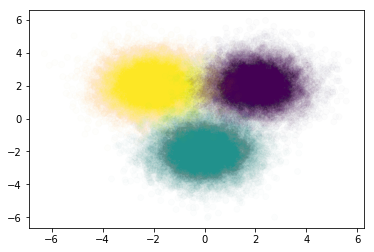

In [2]:
# Simulate Data

D = 2
K = 3
N = int(K*1.5e4)

X0 = np.random.randn((N//K),D) + np.array([2,2])
X1 = np.random.randn((N//K),D) + np.array([0,-2])
X2 = np.random.randn((N//K),D) + np.array([-2,2])
X = np.vstack((X0,X1,X2))

y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))

plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.01)

In [3]:
# Data Prep

Y = one_hot_encode(y)

In [4]:
M = 4

W1_0 = np.random.randn(D,M)
b1_0 = np.random.randn(M)
W2_0 = np.random.randn(M,K)
b2_0 = np.random.randn(K)

Acc is : 0.9709777777777778


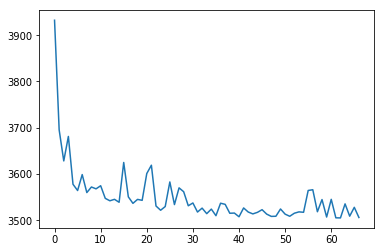

In [5]:
# AdaGrad with Momentum

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J0 = []
eta = 1e-1

mu = 0.5

t=0

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

GW1 = 1
Gb1 = 1

GW2 = 1
Gb2 = 1

Vw1 = 0
Vw2 = 0


Vb1 = 0
Vb2 = 0


for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        
        
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        
        GW2 = GW2 + dW2**2
        Gb2 = Gb2 + (dH2.sum(axis = 0))**2
        
        Vw2 = mu*Vw2 - eta/np.sqrt(GW2 + (1e-10))*dW2
        Vb2 = mu*Vb2 - eta/np.sqrt(Gb2 + (1e-10))*dH2.sum(axis = 0)
        
        W2 += mu*Vw2 - eta/np.sqrt(GW2 + (1e-10))*dW2
        b2 += mu*Vb2 - eta/np.sqrt(Gb2 + (1e-10))*dH2.sum(axis = 0)
       
    #-----------------------------------------------------------------------
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        
        GW1 = GW1 + dW1**2
        Gb1 = Gb1 + (dH1.sum(axis = 0))**2
        
        Vw1 = mu*Vw1 - eta/np.sqrt(GW1 + (1e-10))*dW1
        Vb1 = mu*Vb1 - eta/np.sqrt(Gb1 + (1e-10))*dH1.sum(axis = 0)
        
        W1 += mu*Vw1 - eta/np.sqrt(GW1 + (1e-10))*dW1
        b1 += mu*Vb1 - eta/np.sqrt(Gb1 + (1e-10))*dH1.sum(axis = 0)
        
        if t % 100 == 0:
            P = feed_forward(X, W1, b1, W2, b2)[-1]
            J0.append(cross_entropy(Y,P))
            
plt.plot(J0)
P = feed_forward(X, W1, b1, W2, b2)[-1]
print ("Acc is : {}".format(accuracy(Y,P)))

Acc is : 0.9711555555555555


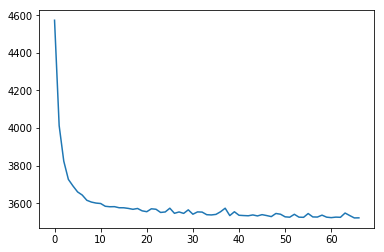

In [6]:
#AdaGrad only

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J = []
eta = 1e-1

mu = 0.9

t = 0

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

GW1 = 1
Gb1 = 1

GW2 = 1
Gb2 = 1


for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        
        
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        
        GW2 = GW2 + dW2**2
        Gb2 = Gb2 + (dH2.sum(axis = 0))**2
        
        W2 -= eta/np.sqrt(GW2 + (1e-10))*dW2
        b2 -= eta/np.sqrt(Gb2 + (1e-10))*dH2.sum(axis = 0)
       
    #-----------------------------------------------------------------------
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        
        GW1 = GW1 + dW1**2
        Gb1 = Gb1 + (dH1.sum(axis = 0))**2
        
        W1 -= eta/np.sqrt(GW1 + (1e-10))*dW1
        b1 -= eta/np.sqrt(Gb1 + (1e-10))*dH1.sum(axis = 0)
        
        if t % 100 == 0:
            P = feed_forward(X, W1, b1, W2, b2)[-1]
            J.append(cross_entropy(Y,P))
            
plt.plot(J)
P = feed_forward(X, W1, b1, W2, b2)[-1]
print ("Acc is : {}".format(accuracy(Y,P)))

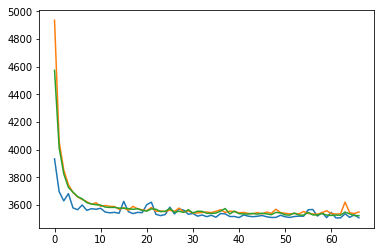

In [7]:
# Constant Learning Rate

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J2 = []
eta = 1e-3


t = 0

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        W2 -= eta*dW2
        b2 -= eta*dH2.sum(axis = 0)
        
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        W1 -= eta*dW1
        b1 -= eta*dH1.sum(axis = 0)
        
        if t % 100 == 0:
            P = feed_forward(X, W1, b1, W2, b2)[-1]
            J2.append(cross_entropy(Y,P))
plt.plot(J0)           
plt.plot(J2)
plt.plot(J)

Acc is : 0.9627333333333333


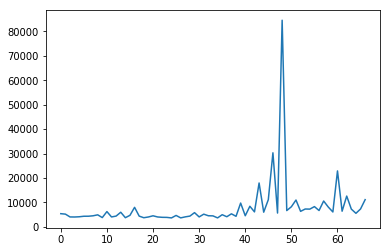

In [8]:
# RMSProp with Momentum

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

J3 = []
eta = 1e-2

t = 0

mu = 0.9
gama = 0.999

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

GW1 = 1
Gb1 = 1

GW2 = 1
Gb2 = 1

Vw1 = 0
Vw2 = 0


Vb1 = 0
Vb2 = 0


for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        
        
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        
        GW2 = gama*GW2 + (1-gama)*dW2**2
        Gb2 = gama*Gb2 + (1-gama)*(dH2.sum(axis = 0))**2
        
        Vw2 = mu*Vw2 - eta/np.sqrt(GW2 + (1e-10))*dW2
        Vb2 = mu*Vb2 - eta/np.sqrt(Gb2 + (1e-10))*dH2.sum(axis = 0)
        
        W2 += mu*Vw2 - eta/np.sqrt(GW2 + (1e-10))*dW2
        b2 += mu*Vb2 - eta/np.sqrt(Gb2 + (1e-10))*dH2.sum(axis = 0)
       
    #-----------------------------------------------------------------------
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        
        GW1 = gama*GW1 + (1-gama)*dW1**2
        Gb1 = gama*Gb1 + (1-gama)*(dH1.sum(axis = 0))**2
        
        Vw1 = mu*Vw1 - eta/np.sqrt(GW1 + (1e-10))*dW1
        Vb1 = mu*Vb1 - eta/np.sqrt(Gb1 + (1e-10))*dH1.sum(axis = 0)
        
        W1 += mu*Vw1 - eta/np.sqrt(GW1 + (1e-10))*dW1
        b1 += mu*Vb1 - eta/np.sqrt(Gb1 + (1e-10))*dH1.sum(axis = 0)
        
        if t % 100 == 0:
            P = feed_forward(X, W1, b1, W2, b2)[-1]
            J3.append(cross_entropy(Y,P))
            
plt.plot(J3)
P = feed_forward(X, W1, b1, W2, b2)[-1]
print ("Acc is : {}".format(accuracy(Y,P)))

Acc is : 0.9672222222222222


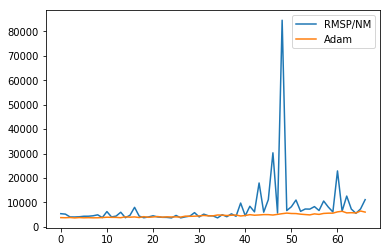

In [14]:
# Adam

W1 = W1_0.copy()
b1 = b1_0.copy()
W2 = W2_0.copy()
b2 = b2_0.copy()

t = 0

J4 = []
eta = 1e-2

#mu = 0.9
#gama = 0.999

mu = 0
gama = 0

batch_sz = 100
n_batches = N//batch_sz

epochs = 15

GW1 = 1
Gb1 = 1

GW2 = 1
Gb2 = 1

Vw1 = 0
Vw2 = 0


Vb1 = 0
Vb2 = 0

Mw1 = 0
Mw2 = 0

Mb1 = 0
Mb2 = 0


for epoch in range(epochs):
    idx = np.random.permutation(N)
    X = X[idx,:]
    Y = Y[idx,:]
    
    for i in range(n_batches):
        X_b = X[(i*batch_sz):((i + 1)*batch_sz),:]
        Y_b = Y[(i*batch_sz):((i + 1)*batch_sz),:]
        
        t += 1
        
        Z1_b, P_b = feed_forward(X_b, W1, b1, W2, b2)
        
        
        
        dH2 = P_b - Y_b
        dW2 = np.matmul(Z1_b.T, dH2)
        
        Mw2 = mu*Mw2 + (1-mu)*dW2
        Mb2 = mu*Mb2 + (1-mu)*(dH2.sum(axis = 0))
        
        GW2 = gama*GW2 + (1-gama)*dW2**2
        Gb2 = gama*Gb2 + (1-gama)*(dH2.sum(axis = 0))**2
        
        
        W2 -= eta/np.sqrt(GW2/(1-gama**t) + (1e-10))*(Mw2/(1-mu**t))
        b2 -= eta/np.sqrt(Gb2/(1-gama**t) + (1e-10))*(Mb2/(1-mu**t))
       
    #-----------------------------------------------------------------------
        dZ1 = np.matmul(dH2, W2.T)
        dH1 = dZ1*(Z1_b > 0)
        dW1 = np.matmul(X_b.T, dH1)
        
        
        GW1 = gama*GW1 + (1-gama)*dW1**2
        Gb1 = gama*Gb1 + (1-gama)*(dH1.sum(axis = 0))**2
        
        Mw1 = mu*Mw1 + (1-mu)*dW1
        Mb1 = mu*Mb1 + (1-mu)*(dH1.sum(axis = 0))
        
        
        W1 -= eta/np.sqrt(GW1/(1-gama**t) + (1e-10))*(Mw1/(1-mu**t))
        b1 -= eta/np.sqrt(Gb1/(1-gama**t) + (1e-10))*(Mb1/(1-mu**t))
        
        if t % 100 == 0:
            P = feed_forward(X, W1, b1, W2, b2)[-1]
            J4.append(cross_entropy(Y,P))
            
plt.plot(J3, label = "RMSP/NM")
plt.plot(J4, label = "Adam")
plt.legend()

P = feed_forward(X, W1, b1, W2, b2)[-1]
print ("Acc is : {}".format(accuracy(Y,P)))

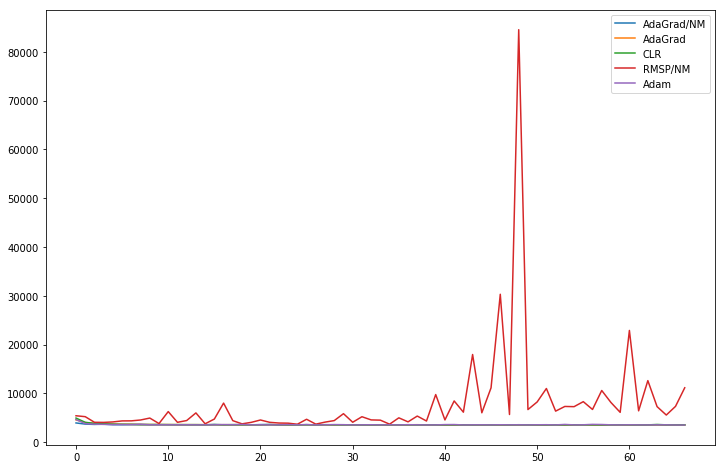

In [10]:
plt.figure(figsize=(12,8))
plt.plot(J0, label = "AdaGrad/NM")
plt.plot(J, label = "AdaGrad")
plt.plot(J2, label = "CLR")
plt.plot(J3, label = "RMSP/NM")
plt.plot(J4, label = "Adam")
plt.legend()


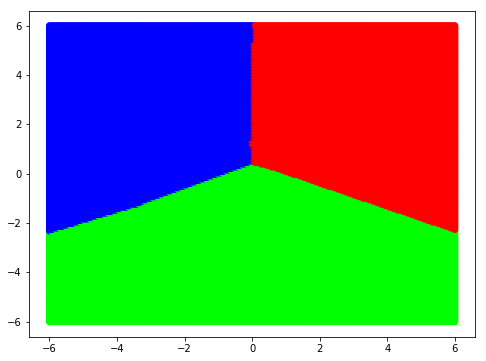

In [11]:
#X_vis = np.random.uniform(-6,6, (int(10*N),D))
X_vis = np.linspace(-6,6,200)
#X_vis = np.hstack((np.ones((int(10*N),1)), X_vis))
X_vis =np.vstack([[(i,j) for i in X_vis] for j in X_vis])

X_vis[:10,:]

p_vis = feed_forward(X_vis, W1, b1, W2, b2)[-1]

y_hat = (p_vis == p_vis.max(axis=1)[:,None]).astype(int)

plt.figure(figsize = (8,6))
plt.scatter(X_vis[:,0], X_vis[:,1], c = y_hat)

In [12]:
X_vis.shape

(40000, 2)